<a href="https://colab.research.google.com/github/sibot89/Deep-Learning/blob/main/MNIST_Classification_Using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, utils, models, layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = train_images.reshape(60000, 784)
X_test = test_images.reshape(10000, 784)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

print(train_labels[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
model = models.Sequential()
model.add(layers.Dense(500, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,610 (1.69 MB)

 Trainable params: 443,610 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.01),
              loss=losses.categorical_crossentropy)

In [6]:
history = model.fit(X_train, Y_train, batch_size=128,
                    epochs=50, validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.7657 - val_loss: 0.6372
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.7186 - val_loss: 0.4234
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.5365 - val_loss: 0.3551
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.4603 - val_loss: 0.3182
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4134 - val_loss: 0.2936
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3839 - val_loss: 0.2738
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3543 - val_loss: 0.2590
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3339 - val_loss: 0.2462
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3161 - val_loss: 0.2357
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2985 - val_loss: 0.2253
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2835 - val_loss: 0.2159
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 

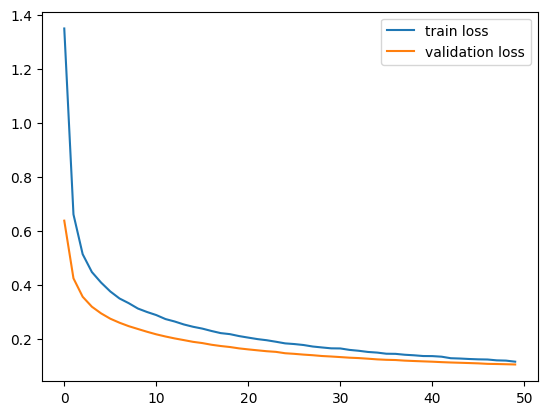

In [7]:
loss_hist = history.history['loss']
val_loss_hist = history.history['val_loss']

plt.plot(loss_hist)
plt.plot(val_loss_hist)
plt.legend(['train loss', 'validation loss'])

In [8]:
test_loss = model.evaluate(X_test, Y_test)
print('test loss:', test_loss)

test_labels_p = model.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1156
test loss: 0.09952691197395325
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


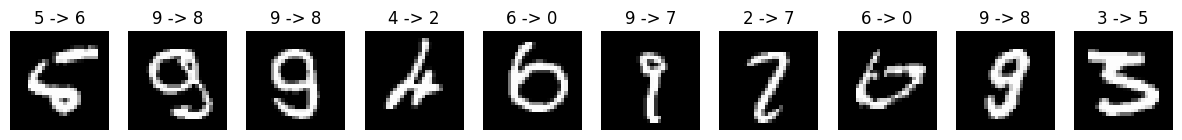

In [9]:
n = 0
f, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(len(test_labels)):
  if n >= 10:
    break
  if (test_labels_p[i] != test_labels[i]):
    axs[n].imshow(test_images[i], cmap='gray')
    axs[n].set_title(f"{test_labels[i]} -> {test_labels_p[i]}")
    axs[n].axis('off')
    n = n + 1